## Úloha 05: Hledání kořenů rovnice

Srovnání výpočtů pomocí uzavřené a otevřené metody (bisekce a newtonovy metody).

Zvolené funkce:
* x**2
* log(x-2)
* sin(x)

Níže je znázorněno:
* srovnání časové náročnosti 
* srovnání přesnosti výsledků

In [100]:
import time
import numpy as np
import matplotlib.pyplot as plt

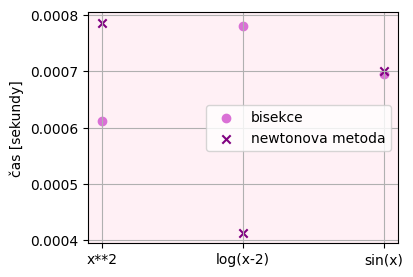

In [115]:
# srovnání časové náročnosti nalezení kořene pomocí uzavřené a otevřené metody

funkce = ["x**2", "log(x-2)", "sin(x)"]
casy_bisekce = [cas_bisekce_1, cas_bisekce_2, cas_bisekce_3]
casy_newton = [cas_newton_1, cas_newton_2, cas_newton_3]

plt.figure(figsize=(4,3))
plt.scatter(funkce, casy_bisekce, marker="o", color="orchid", label="bisekce")
plt.scatter(funkce, casy_newton, marker="x", color="purple", label="newtonova metoda")
plt.gca().set_facecolor("lavenderblush")
plt.ylabel("čas [sekundy]")
plt.grid()
plt.legend()
plt.show()


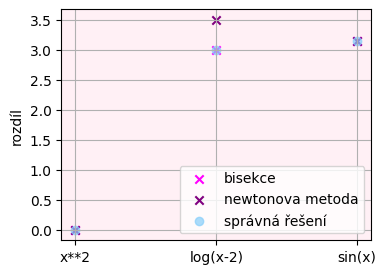

In [123]:
# srovnání přesnosti výsledků

funkce = ["x**2", "log(x-2)", "sin(x)"]
bisekce_vysledky = [bisekce_1, bisekce_2, bisekce_3]
newton_vysledky = [newton_1, newton_2, newton_3]
spravna_reseni = [0, 3, np.pi]

plt.figure(figsize=(4,3))
plt.scatter(funkce, bisekce_vysledky, marker="x", color="magenta", label="bisekce")
plt.scatter(funkce, newton_vysledky, marker="x", color="purple", label="newtonova metoda")
plt.scatter(funkce, spravna_reseni, marker="o", color="lightskyblue", alpha=0.7, label="správná řešení")

plt.gca().set_facecolor("lavenderblush")
plt.ylabel("rozdíl")
plt.grid()
plt.legend()
plt.show()

x = 0.0


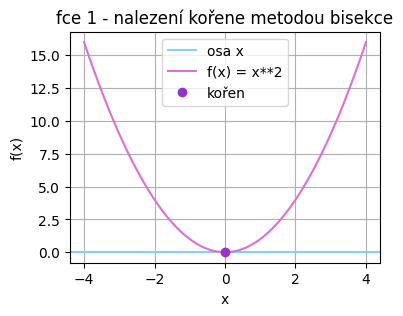

In [135]:
# FUNKCE 1 - uzavřená metoda
t1 = time.perf_counter()

def bisekce(f, zacatek_intervalu, konec_intervalu, pocet_puleni):
    a = zacatek_intervalu
    b = konec_intervalu
    n = pocet_puleni
    koren = np.empty(shape=[n])
    for i in range(n):
        x = (a + b) / 2
        if f(a) * f(x) < 0:
            b = x
        else:
            a = x
        koren[i] = x
        return koren[i]

def f(x):
    return x**2

bisekce_1 = bisekce(f, -4, 4, 10)
t2 = time.perf_counter()

print(f"x = {bisekce_1}")
cas_bisekce_1 = t2 - t1

plt.figure(figsize=(4,3)) 
plt.axhline(0, color="lightskyblue", linestyle="-", label="osa x")
interval = np.linspace(-4, 4, 100)
plt.plot(interval, f(interval), "orchid", label="f(x) = x**2")
plt.plot(bisekce_1, f(bisekce_1), "o", color="darkorchid", label="kořen")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("fce 1 - nalezení kořene metodou bisekce")
plt.legend()
plt.grid()
plt.show()

x = 0.0


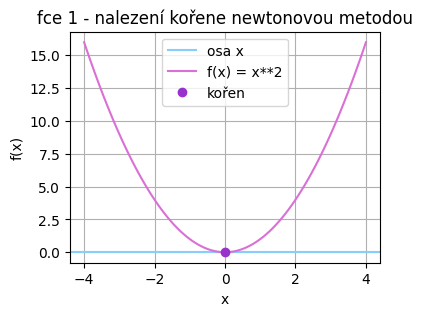

In [133]:
# FUNKCE 1 - otevřená metoda
t1 = time.perf_counter()

def newtonova_metoda(f, a0, b0, delta=1E-3):
    a, b = a0, b0

    def derivace(x, h=1E-3):
        return (f(x+h)-f(x-h)/(2*h))


    x_new = (a+b)/2
    x_old = a
    while abs(x_new - x_old) > delta:
        x_old = x_new
        x_new = x_old - f(x_old)/derivace(x_old)
    return x_new

def f(x):
    return x**2

newton_1 = newtonova_metoda(f, -4, 4)

t2 = time.perf_counter()
cas_newton_1 = t2 - t1

print(f"x = {newton_1}")

plt.figure(figsize=(4,3)) 
plt.axhline(0, color="lightskyblue", linestyle="-", label="osa x")
interval = np.linspace(-4, 4, 100)
plt.plot(interval, f(interval), "orchid", label="f(x) = x**2")
plt.plot(newton_1, f(newton_1), "o", color="darkorchid", label="kořen")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("fce 1 - nalezení kořene newtonovou metodou")
plt.legend()
plt.grid()
plt.show()

x = 3.00048828125


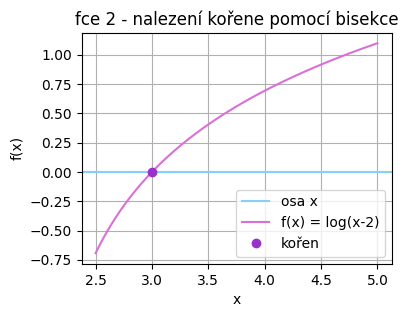

In [136]:
# FUNKCE 2 - uzavřená metoda
t1 = time.perf_counter()

def bisekce(f, zacatek_intervalu, konec_intervalu, pocet_puleni):
    a = zacatek_intervalu
    b = konec_intervalu
    n = pocet_puleni
    koren = np.empty(shape=[n])
    for i in range(n):
        x = (a + b) / 2
        if f(a) * f(x) < 0:
            b = x
        else:
            a = x
        koren[i] = x
    return koren[-1]

def f(x):
    return np.log(x-2)

bisekce_2 = bisekce(f, 2.5, 5, 10)
t2 = time.perf_counter()

print(f"x = {bisekce_2}")
cas_bisekce_2 = t2 - t1

plt.figure(figsize=(4,3)) 
plt.axhline(0, color="lightskyblue", linestyle="-", label="osa x")
interval = np.linspace(2.5, 5, 100)
plt.plot(interval, f(interval), "orchid", label="f(x) = log(x-2)")
plt.plot(bisekce_2, f(bisekce_2), "o", color="darkorchid", label="kořen")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("fce 2 - nalezení kořene pomocí bisekce")
plt.legend()
plt.grid()
plt.show()

x = 3.5


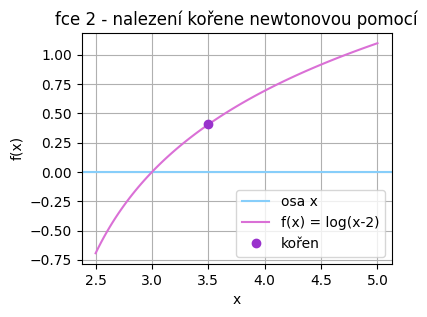

In [137]:
# FUNKCE 2 - otevřená metoda
t1 = time.perf_counter()

def newtonova_metoda(f, a0, b0, delta=1E-3):
    a, b = a0, b0

    def derivace(x, h=1E-3):
        return (f(x+h)-f(x-h)/(2*h))


    x_new = (a+b)/2
    x_old = a
    while abs(x_new - x_old) > delta:
        x_old = x_new
        x_new = x_old - f(x_old)/derivace(x_old)
    return x_new

def f(x):
    return np.log(x-2)

newton_2 = newtonova_metoda(f, 2,5, 5)

t2 = time.perf_counter()
cas_newton_2 = t2 - t1

print(f"x = {newton_2}")

plt.figure(figsize=(4,3)) 
plt.axhline(0, color="lightskyblue", linestyle="-", label="osa x")
interval = np.linspace(2.5, 5, 100)
plt.plot(interval, f(interval), "orchid", label="f(x) = log(x-2)")
plt.plot(newton_2, f(newton_2), "o", color="darkorchid", label="kořen")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("fce 2 - nalezení kořene newtonovou pomocí")
plt.legend()
plt.grid()
plt.show()

x = 3.1477285767413354


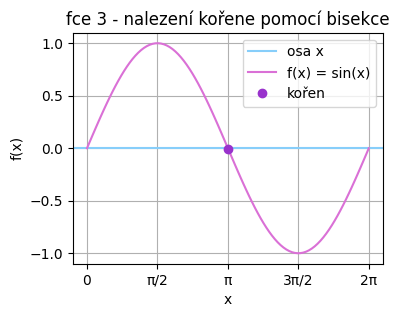

In [138]:
# FUNKCE 3 - uzavřená metoda
t1 = time.perf_counter()

def bisekce(f, zacatek_intervalu, konec_intervalu, pocet_puleni):
    a = zacatek_intervalu
    b = konec_intervalu
    n = pocet_puleni
    koren = np.empty(shape=[n])
    for i in range(n):
        x = (a + b) / 2
        if f(a) * f(x) < 0:
            b = x
        else:
            a = x
        koren[i] = x
    return koren[-1]

def f(x):
    return np.sin(x)

bisekce_3 = bisekce(f, 0, 2*np.pi, 10)
t2 = time.perf_counter()

print(f"x = {bisekce_3}")
cas_bisekce_3 = t2 - t1

plt.figure(figsize=(4,3)) 
plt.axhline(0, color="lightskyblue", linestyle="-", label="osa x")
interval = np.linspace(0, 2*np.pi, 100)
plt.xticks([0, np.pi/2, np.pi, np.pi*3/2, 2*np.pi], ["0", "π/2", "π", "3π/2", "2π"])
plt.plot(interval, f(interval), "orchid", label='f(x) = sin(x)')
plt.plot(bisekce_3, f(bisekce_3), "o", color="darkorchid", label="kořen")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("fce 3 - nalezení kořene pomocí bisekce")
plt.legend()
plt.grid()
plt.show()

x = 3.1415926535897936


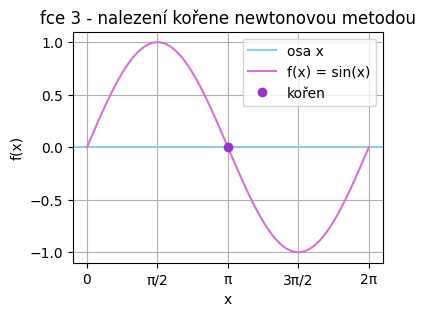

In [139]:
# FUNKCE 3 - neohraničená metoda
t1 = time.perf_counter()

def newtonova_metoda(f, a0, b0, delta=1E-3):
    a, b = a0, b0

    def derivace(x, h=1E-3):
        return (f(x+h)-f(x-h)/(2*h))


    x_new = (a+b)/2
    x_old = a
    while abs(x_new - x_old) > delta:
        x_old = x_new
        x_new = x_old - f(x_old)/derivace(x_old)
    return x_new

def f(x):
    return np.sin(x)

newton_3 = newtonova_metoda(f, 0, 2*np.pi)

t2 = time.perf_counter()
cas_newton_3 = t2 - t1

print(f"x = {newton_3}")

plt.figure(figsize=(4,3)) 
plt.axhline(0, color="lightskyblue", linestyle="-", label="osa x")
interval = np.linspace(0, 2*np.pi, 100)
plt.xticks([0, np.pi/2, np.pi, np.pi*3/2, 2*np.pi], ["0", "π/2", "π", "3π/2", "2π"])
plt.plot(interval, f(interval), "orchid", label='f(x) = sin(x)')
plt.plot(newton_3, f(newton_3), "o", color="darkorchid", label="kořen")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("fce 3 - nalezení kořene newtonovou metodou")
plt.legend()
plt.grid()
plt.show()